------------
![Bluemetrica](../bluemetrica_large.png)

----------


# Seaborn

Seaborn to biblioteka do tworzenia wykresów statystycznych. Nie ma wielu opcji modyfikacji wykresu, ale za to budowa wykresów jest prosta i intuicyjna a stworzone wizualizacje estetyczne.

Dokumentacja:
https://seaborn.pydata.org/

Dostepne style:
https://seaborn.pydata.org/generated/seaborn.set_style.html

Palety kolorystyczne:
https://seaborn.pydata.org/tutorial/color_palettes.html

Przykladowa galeria:
https://seaborn.pydata.org/examples/index.html

In [2]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

# żeby było widac wykresy
%matplotlib inline

## Wczytujemy dane

In [ ]:
# te formaty zachwają typy zmiennych
# pd.read_pickle() # .pkl
# pd.read_feather() # .feather

In [6]:
wino = pd.read_csv("../data/winemag-data-130k-v2.csv")

### Wykresy rozkładu jednej zmiennej

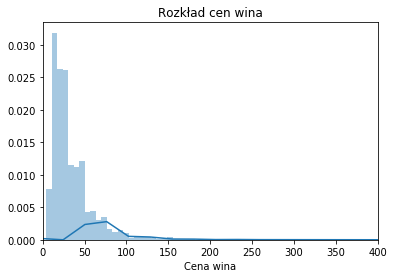

In [34]:
sns.distplot(wino.price[wino.price.notna()], bins = 500)
plt.xlim([0, 400])
# plt.xscale("log")

plt.title("Rozkład cen wina")
plt.xlabel("Cena wina")

plt.savefig("wykres.png") # zapisywanie obrazka

plt.show() # wyswietla wykres (konieczne poza iPythonem)

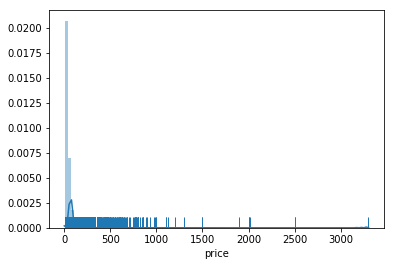

In [25]:
sns.distplot(wino.price[wino.price.notna()], bins = 100,
            rug = True, hist = False, kde = False)

### Dwie zmienne na wykresie

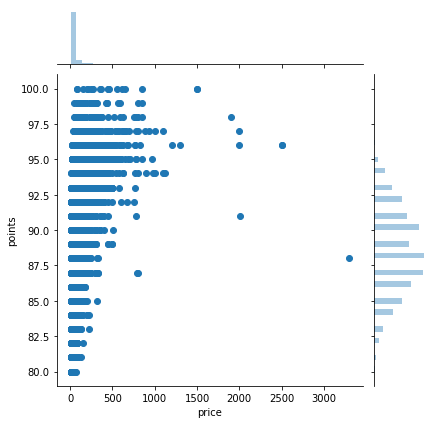

In [37]:
sns.jointplot("price", "points", wino)

Czy długość recenzji jest skorelowana z oceną?

In [41]:
wino['descr_len'] = wino.description.str.len()

In [50]:
wino[['descr_len', 'points', 'price']].corr('spearman')

,descr_len,points,price
descr_len,1.000000,0.548720,0.374278
points,0.548720,1.000000,0.605785
price,0.374278,0.605785,1.000000


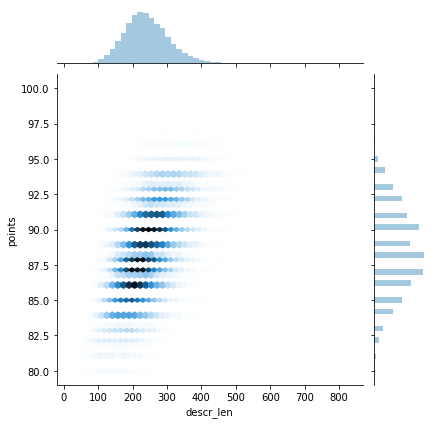

In [52]:
sns.jointplot('descr_len', 'points', wino, kind = "hex")

In [55]:
wino.nunique()

Unnamed: 0               129971
country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
descr_len                   577
dtype: int64

(0, 500)

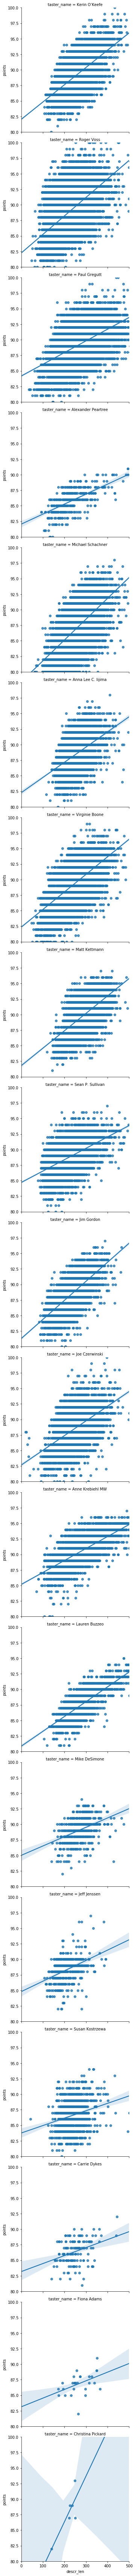

In [59]:
sns.lmplot('descr_len', 'points', wino, row = 'taster_name')
plt.ylim([80,100])
plt.xlim([0, 500])

In [63]:
wino2 = wino.copy()

In [76]:
kolory = {i:"gray" for i in wino2['taster_name'].unique()}
kolory['Fiona Adams'] = "red"
kolory

{'Kerin O’Keefe': 'gray',
 'Roger Voss': 'gray',
 'Paul Gregutt': 'gray',
 'Alexander Peartree': 'gray',
 'Michael Schachner': 'gray',
 'Anna Lee C. Iijima': 'gray',
 'Virginie Boone': 'gray',
 'Matt Kettmann': 'gray',
 nan: 'gray',
 'Sean P. Sullivan': 'gray',
 'Jim Gordon': 'gray',
 'Joe Czerwinski': 'gray',
 'Anne Krebiehl\xa0MW': 'gray',
 'Lauren Buzzeo': 'gray',
 'Mike DeSimone': 'gray',
 'Jeff Jenssen': 'gray',
 'Susan Kostrzewa': 'gray',
 'Carrie Dykes': 'gray',
 'Fiona Adams': 'red',
 'Christina Pickard': 'gray'}

(0, 500)

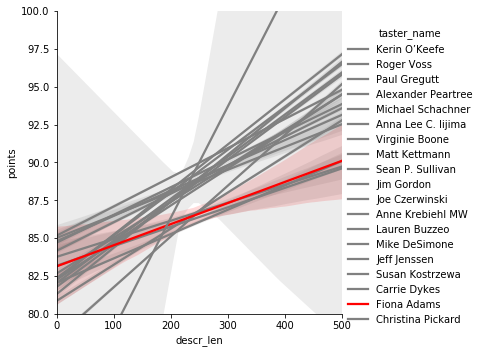

In [77]:
sns.lmplot('descr_len', 'points', wino2, palette = kolory,
           hue = 'taster_name', scatter = False)
plt.ylim([80,100])
plt.xlim([0, 500])

### Zmienna numeryczna vs zmienna kategorii

- wykres słupkowy (bar)
- wykres pudełkowy (boxplot)
- wykres skrzypcowy (violin)
- swarmplot

In [88]:
kolejnosc = wino.groupby('country')['price'].mean().sort_values(ascending = False).index

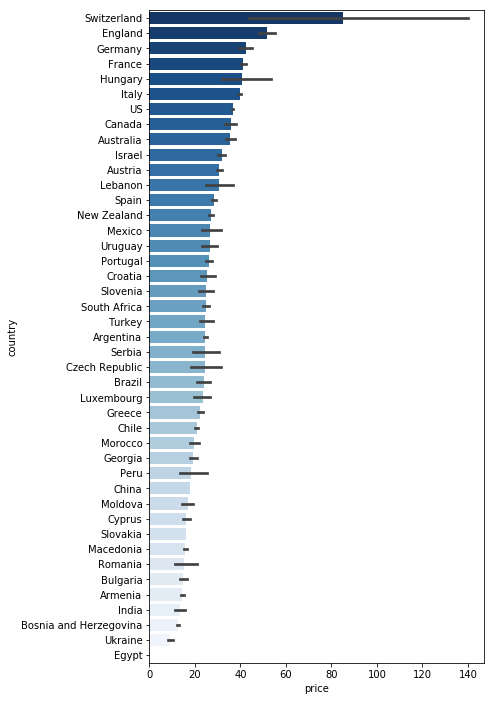

In [93]:
plt.figure(figsize = (6, 12))
sns.barplot(y='country', x='price', data = wino, orient = "h",
           order = kolejnosc, palette="Blues_r")

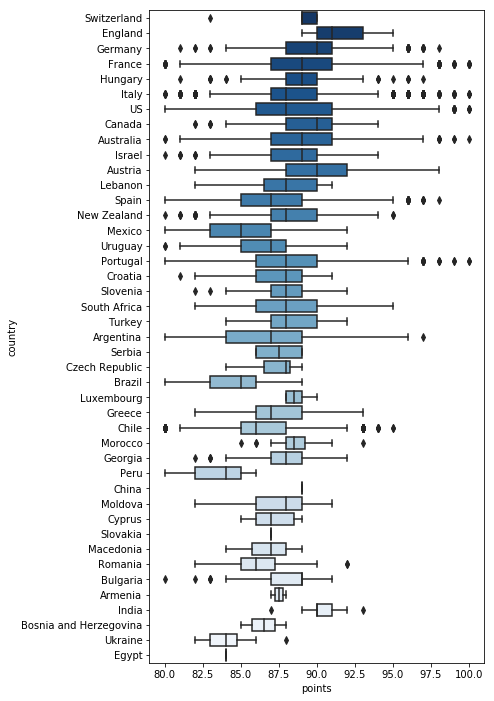

In [96]:
plt.figure(figsize = (6, 12))
sns.boxplot(y='country', x='points', data = wino, orient = "h",
           order = kolejnosc, palette="Blues_r")

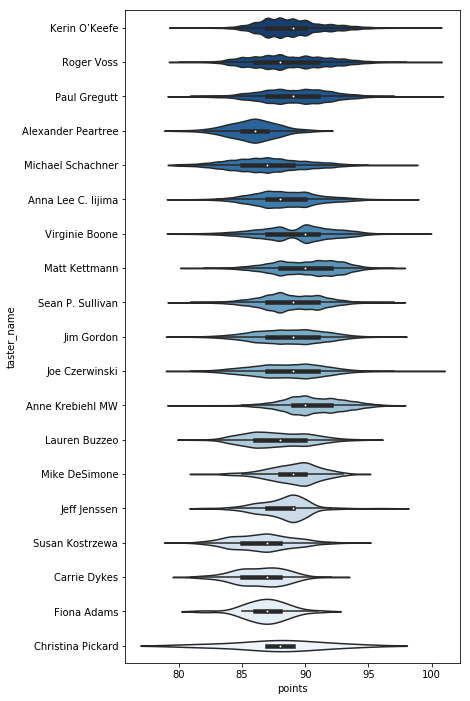

In [99]:
plt.figure(figsize = (6, 12))
sns.violinplot(y='taster_name', x='points', data = wino,
               orient = "h", palette="Blues_r")

### Heatmapa

Kategoria vs kategoria

In [118]:
pivot = pd.pivot_table(wino, values = "points",
               index='country', columns='taster_name')

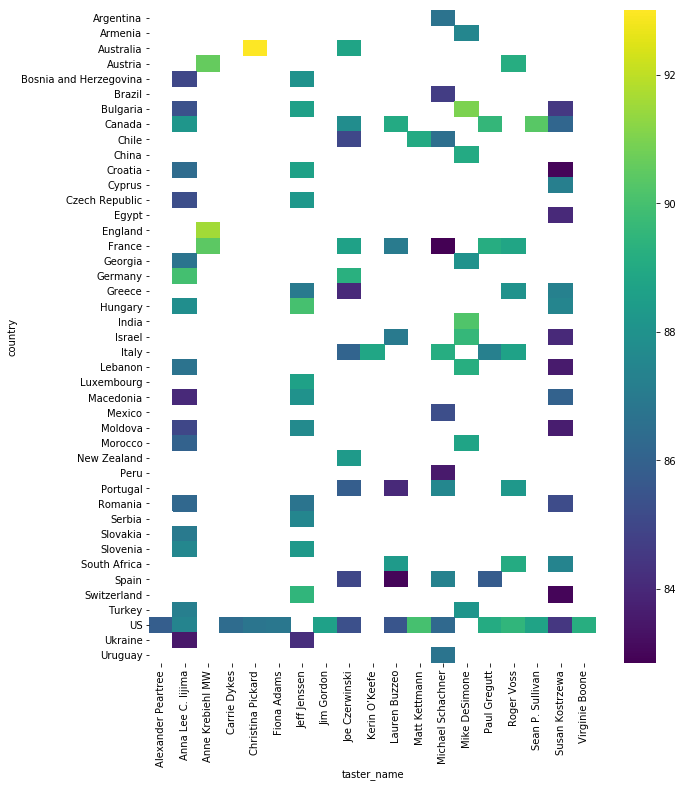

In [119]:
plt.figure(figsize = (10, 12))
sns.heatmap(pivot, cmap = 'viridis')

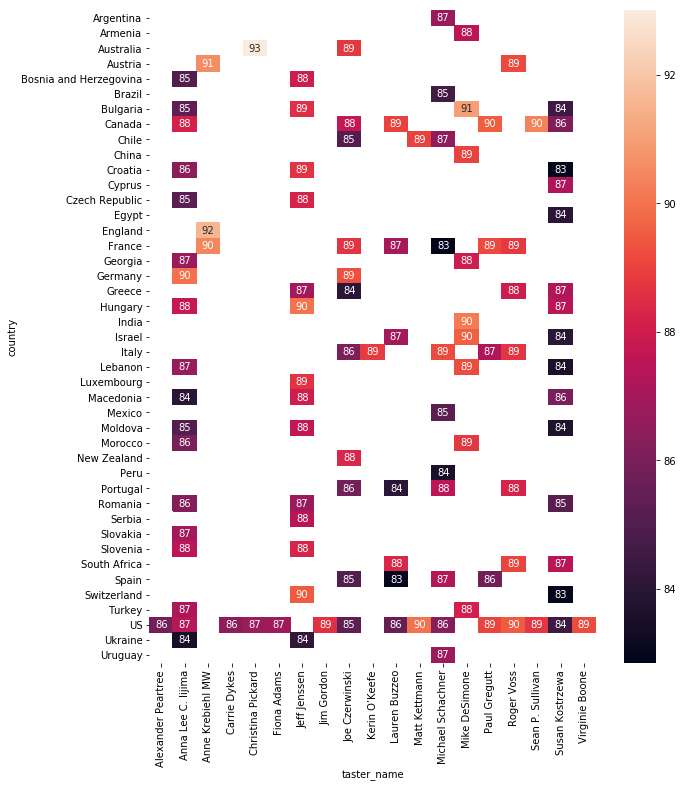

In [120]:
plt.figure(figsize = (10, 12))
sns.heatmap(pivot, annot = True)